In [12]:
import db_connect
sql = db_connect.DatabaseConnect('CS581GROUP6','localhost','root','qwerty','3306')

In [39]:
class Evaluation(object):
    def __init__(self, start_time, stop_time):
        self.start_time = start_time
        self.stop_time=stop_time
    
    def evalute_dist_saved(self):
        df = sql.query("""select poolingWindowID, sum(indvRideDist) as sum_indv_rides, sum(sharedRideDist) as sum_shared_rides from rides as rd left join REQUESTS as rq on rd.reqID = rq.reqID group by poolingwindowid;""")
        df.plot(kind='line')
        self.saved_dist = sum(df.sum_indv_rides)-sum(df.sum_shared_rides)
        print('saved_dist: ',self.saved_dist)
        print(df)
    
    def evalute_trips_saved(self):
        df = sql.query("""select poolingWindowID, count(indvRideDist) as total_indv_rides, count(sharedRideDist) as total_shared_rides from rides as rd right join REQUESTS as rq on rd.reqID = rq.reqID right join POOLING_WINDOW as pw on rq.poolingwindowid = pw.poolingwindowid  where pw.poolingstarttime >= str_to_date('{}','%y-%m-%d %H:%i:%S') and pw.poolingstarttime >= str_to_date('{}','%y-%m-%d %H:%i:%S') group by pw.poolingwindowid;""".format(self.start_time, self.stop_time))
        df.plot(kind='line')
        self.saved_trips = sum(df.total_indv_rides)-sum(df.total_shared_rides)
        print('saved_trips: ',self.saved_trips)
    
        
    def eval_pool_compute_time(self):
        df = sql.query("""select poolingDuration, avg(poolingWindowComputeTime) as avd_compute_time from POOLING_WINDOW as pw where pw.poolingstarttime >= str_to_date('{}','%Y-%m-%d %H:%i:%S') and pw.poolingstarttime >= str_to_date('{}','%Y-%m-%d %H:%i:%S') group by pw.poolingduration;""".format(self.start_time, self.stop_time))
        df.plot(kind='bar')
        self.avg_compute_time = sum(df.avd_compute_time)/len(df.avd_compute_time)
        print('avg_compute_time: ',self.avg_compute_time)

In [40]:
c = Evaluation('2016-06-10 08:00:00','2016-06-10 22:00:00')

saved_dist:  -472548.901
  poolingWindowID  sum_indv_rides  sum_shared_rides
0               1          351.87        413892.580
1               2          114.78         59122.971


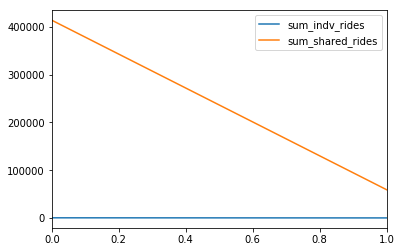

In [41]:
c.evalute_dist_saved()